# Parcial Practico 

## *Ejercicio 1* Analisis Exploratorio de Datos

In [2]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
sns.set_style("whitegrid")

In [41]:
bit=pd.read_csv('BTC-USD-2.csv')
bit[['Year', 'Month', 'Day']] = bit['Date'].str.split('-', expand=True)
bit['Date']=pd.to_datetime(bit[['Year', 'Month', 'Day']])
bit.index = bit['Date']
bit.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,09,17
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,09,18
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,09,19
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,09,20
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,09,21


In [42]:
bit.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

In [43]:
bit.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

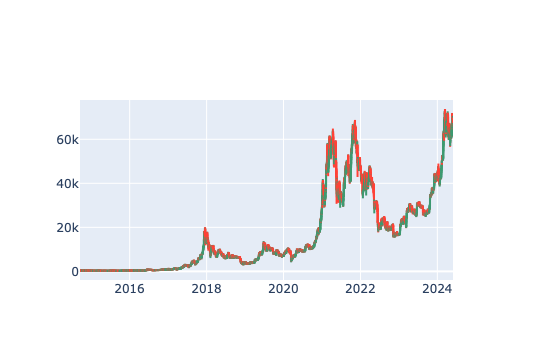

In [44]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = bit.Date,
                                     open = bit.Open, 
                                     high = bit.High,
                                     low = bit.Low, 
                                     close = bit.Close)
                     ])
fig.update_layout(xaxis_rangeslider_visible=False)
fig

Podemos observar en el grafico de vela que nuestros valores oscilan sin patron

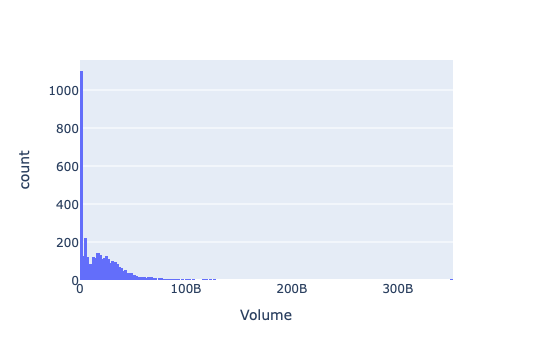

In [46]:
fig = px.histogram(bit, x="Volume")
fig.show()

Los datos estan sesgados a la izquierda.

In [48]:
import warnings
warnings.filterwarnings("ignore")
weekly = bit["Close"].resample("7d").mean()
monthly= bit["Close"].resample("M").mean()
year = bit["Close"].resample("Y").mean()

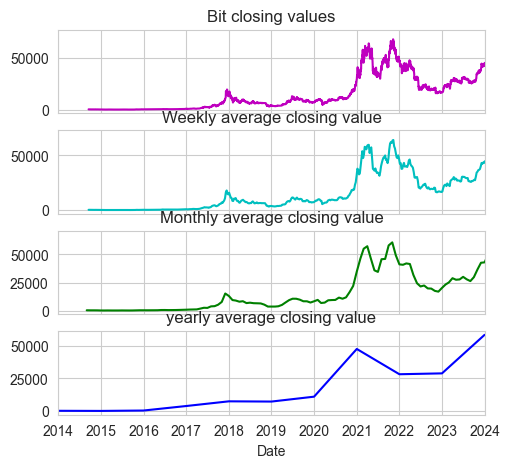

In [50]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5,5)

bit['Close'].plot(ax=axarr[0], color='m')
axarr[0].set_title('Bit closing values');

weekly.plot(ax=axarr[1], color='c')
axarr[1].set_title('Weekly average closing value');

monthly.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly average closing value');

year.plot(ax=axarr[3], color='b')
axarr[3].set_title('yearly average closing value');

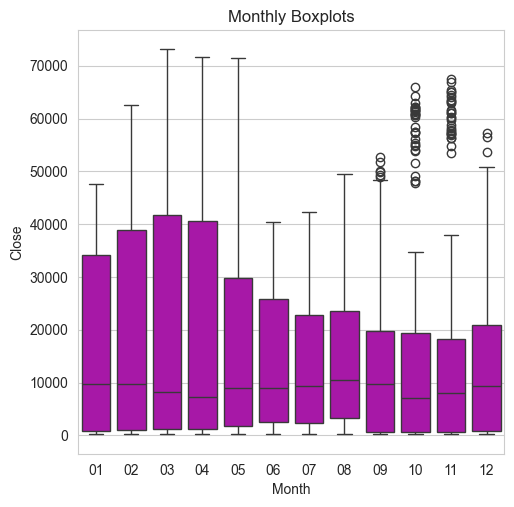

In [57]:
month=bit.sort_values(by=['Month'])
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=month, y='Close', x='Month',color="m")
g.set_title('Monthly Boxplots')
g.set_xlabel('Month')
g.set_ylabel('Close');

Observamos que los primeros meses del año tiene mayor valor de cierre la bitcoin y en los 4 ultimos meses del año hay valores atipicos.

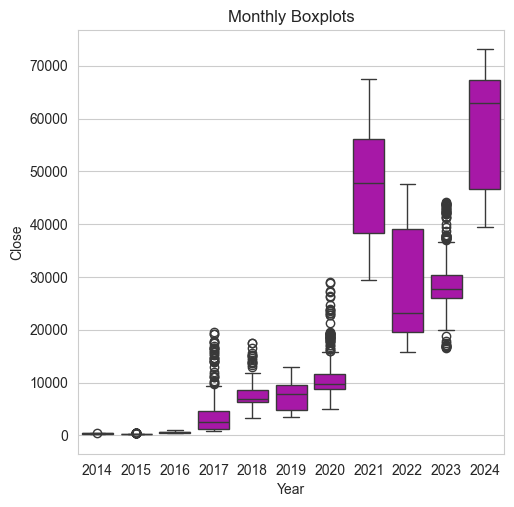

In [58]:
year=bit.sort_values(by=['Year'])
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=year, y='Close', x='Year',color="m")
g.set_title('Monthly Boxplots')
g.set_xlabel('Year')
g.set_ylabel('Close');

Se observa a medida que aumentan los años aumenta el valor de cierre de las bitcoin. Solo los años 2021, 2022 y 2024 no tiene datos atipicos.

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

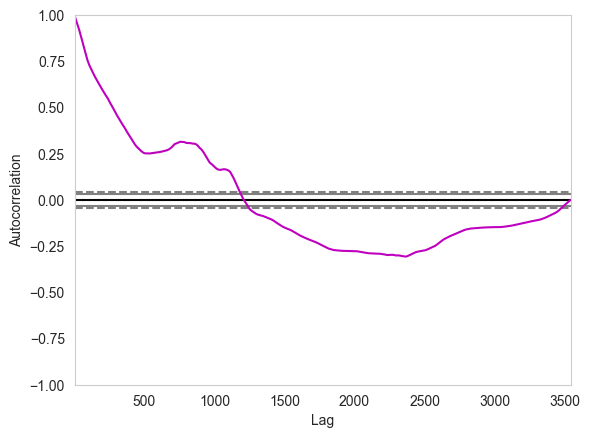

In [61]:
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(bit['Close'], color='m')

In [63]:
acf_bit, confint_bit, qstat_bit, pvalues_bit = stattools.acf(bit['Close'],
                                                                 nlags=31,
                                                                 qstat=True,
                                                                 alpha=0.05)
alpha = 0.05
for l, p_val in enumerate(pvalues_bit):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

nuestra serie es estacionaria por lpque podemos ver anteriormente por que no podemos concluir que nuestra serie de tiempo sea estacionaria. Por lo anterior hacemos una transformacion logisitica y comprobamos la estacionaridad de serie

In [65]:
bit['close_logs'] = np.log(bit['Close'])
acf_bit_log, confint_bit, qstat_bit, pvalues_bit_log = stattools.acf(bit['close_logs'],
                                                                 nlags=31,
                                                                 qstat=True,
                                                                 alpha=0.05)
alpha = 0.05
alpha = 0.05
for l, p_val in enumerate(pvalues_bit_log):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

Nuestra series se  estacionaria ya que se rechaza la hipotesis de no estacionaridad.

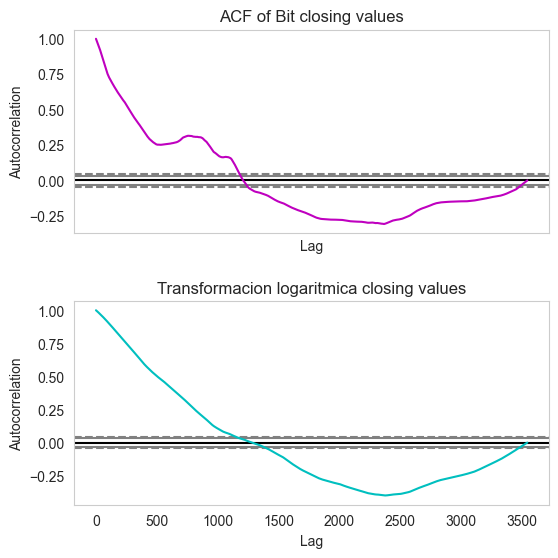

In [67]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(bit['Close'], color='m', ax=ax[0])
ax[0].set_title('ACF of Bit closing values')
autocorrelation_plot(bit['close_logs'], color='c', ax=ax[1])
ax[1].set_title('Transformacion logaritmica closing values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [68]:
w_stats = bit['Close'].resample("7d").aggregate([np.mean, np.median, np.std])
w_stats.head()

,mean,median,std
Date,,,
2014-09-17,417.462572,408.903992,22.888467
2014-09-24,396.902283,399.519989,17.879702
2014-10-01,347.691572,336.187012,24.885399
2014-10-08,373.094290,365.026001,17.426227
2014-10-15,387.342141,386.475006,4.718985


In [69]:
m_stats = bit['Close'].resample("1m").aggregate([np.mean, np.median, np.std])
m_stats.head()

,mean,median,std
Date,,,
2014-09-30,407.182428,403.288498,22.430977
2014-10-31,364.148873,361.562012,22.135762
2014-11-30,366.099799,368.032501,24.659780
2014-12-31,341.267871,334.571991,23.587774
2015-01-31,248.782547,247.847000,35.247740


In [70]:
y_stats = bit['Close'].resample("1Y").aggregate([np.mean, np.median, np.std])
y_stats.head()

,mean,median,std
Date,,,
2014-12-31,363.693085,364.145005,30.521741
2015-12-31,272.453381,249.007004,59.337860
2016-12-31,568.492407,582.555999,139.255734
2017-12-31,4006.033629,2589.409912,4053.192202
2018-12-31,7572.298947,6906.919922,2455.455466


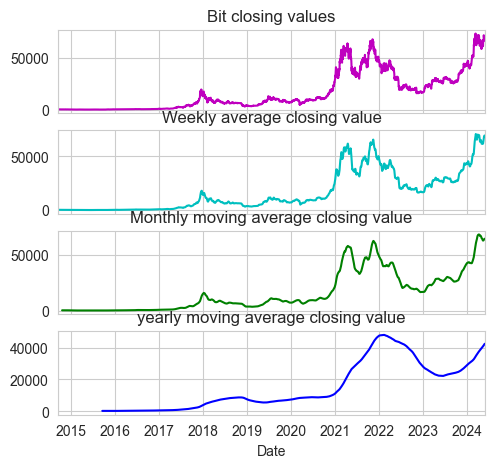

In [71]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5,5)

bit['Close'].plot(ax=axarr[0], color='m')
axarr[0].set_title('Bit closing values');

weekly_moving_average = bit['Close'].rolling(7).mean()
weekly_moving_average.plot(ax=axarr[1], color='c')
axarr[1].set_title('Weekly average closing value');

monthly_moving_average = bit['Close'].rolling(31).mean()
monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average closing value');

year_moving_average = bit['Close'].rolling(365).mean()
year_moving_average.plot(ax=axarr[3], color='b')
axarr[3].set_title('yearly moving average closing value');

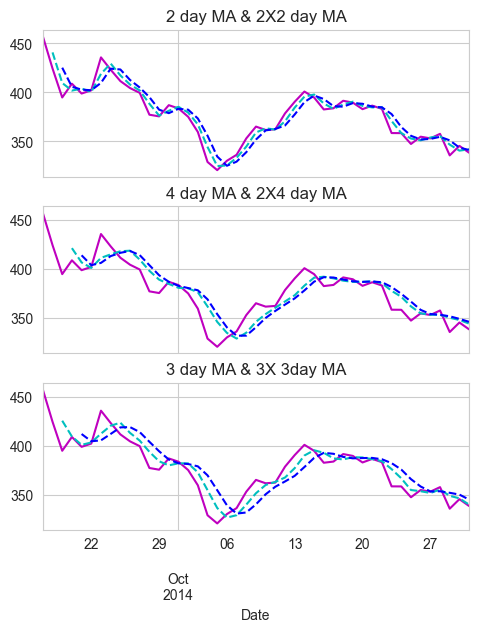

In [74]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 6.5)

MA2 = bit['Close'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()
bit['Close'].iloc[:45].plot(color='m', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='c', linestyle = '--', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='b', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA');

MA4 = bit['Close'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
bit['Close'].iloc[:45].plot(color='m', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='c', linestyle = '--', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='b', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA');

MA3 = bit['Close'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()
bit['Close'].iloc[:45].plot(color='m', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='c', linestyle = '--', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='b', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA');

Revisamos medias moviles primero de 2 dias y 2X2 dias

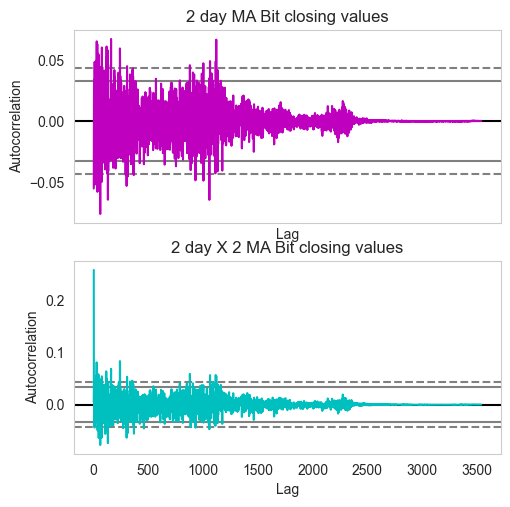

In [75]:
residualsMA2 = bit['Close']-MA2
residualsMA2 = residualsMA2.loc[~pd.isnull(residualsMA2)]
residualsTwoMA2 = bit['Close']-TwoXMA2
residualsTwoMA2 = residualsTwoMA2.loc[~pd.isnull(residualsTwoMA2)]
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(residualsMA2, color='m', ax=ax[0])
ax[0].set_title('2 day MA Bit closing values')
autocorrelation_plot(residualsTwoMA2, color='c', ax=ax[1])
ax[1].set_title('2 day X 2 MA Bit closing values')
plt.show()

se observa que pueden ser estacionarios nuestro residuos comprobamos con pruebas de hipotesis dicker y fuller

In [76]:
_, _, _, pval_MA2 = stattools.acf(residualsMA2,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_MA2<=0.05))


Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


In [77]:
_, _, _, pval_TwoMA2X = stattools.acf(residualsTwoMA2,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_TwoMA2X<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


Se no rechaza la estacionaridad para los residuos. Hacemos la comprobacion par medias moviles 3 dias y 3 dias por 3 dias

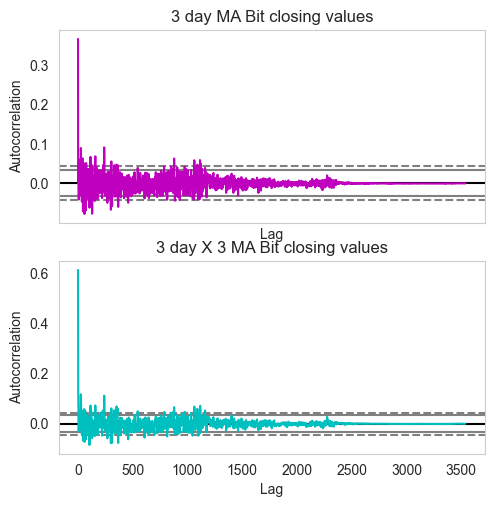

In [79]:
residualsMA3 = bit['Close']-MA3
residualsMA3 = residualsMA3.loc[~pd.isnull(residualsMA3)]
residualsThreeMA3 = bit['Close']-ThreeXMA3
residualsThreeMA3 = residualsThreeMA3.loc[~pd.isnull(residualsThreeMA3)]
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(residualsMA3, color='m', ax=ax[0])
ax[0].set_title('3 day MA Bit closing values')
autocorrelation_plot(residualsThreeMA3, color='c', ax=ax[1])
ax[1].set_title('3 day X 3 MA Bit closing values')
plt.show()

In [80]:
_, _, _, pval_MA3 = stattools.acf(residualsMA3,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_MA3<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


In [81]:
_, _, _, pval_ThreeMA3X = stattools.acf(residualsThreeMA3,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_ThreeMA3X<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


Se no rechaza la hipotesis de estacionaridad. Ahora comprobamos medias moviles de 4 y medias moviles de 2x4

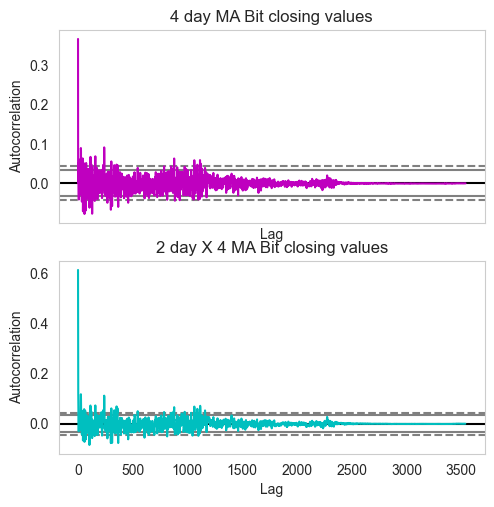

In [85]:
residualsMA4 = bit['Close']-MA4
residualsMA4 = residualsMA4.loc[~pd.isnull(residualsMA4)]
residualsTwoMA4 = bit['Close']-TwoXMA4
residualsTwoMA4 = residualsTwoMA4.loc[~pd.isnull(residualsTwoMA4)]
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(residualsMA3, color='m', ax=ax[0])
ax[0].set_title('4 day MA Bit closing values')
autocorrelation_plot(residualsThreeMA3, color='c', ax=ax[1])
ax[1].set_title('2 day X 4 MA Bit closing values')
plt.show()

se observa la misma tendecia de las medias moviles anteriores por lo que se procede a hacer la prueba

In [83]:
_, _, _, pval_MA4 = stattools.acf(residualsMA4,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_MA3<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


In [86]:
_, _, _, pval_TwoMA4X = stattools.acf(residualsTwoMA4,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_TwoMA4X<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


Se norechaza la hipotesis de estacionaridad.

In [87]:
adf_result = stattools.adfuller(bit['Close'], autolag='AIC')
print('p-val of the ADF test on irregular variations in bit coin data:', adf_result[1])

p-val of the ADF test on irregular variations in bit coin data: 0.8762500083391092


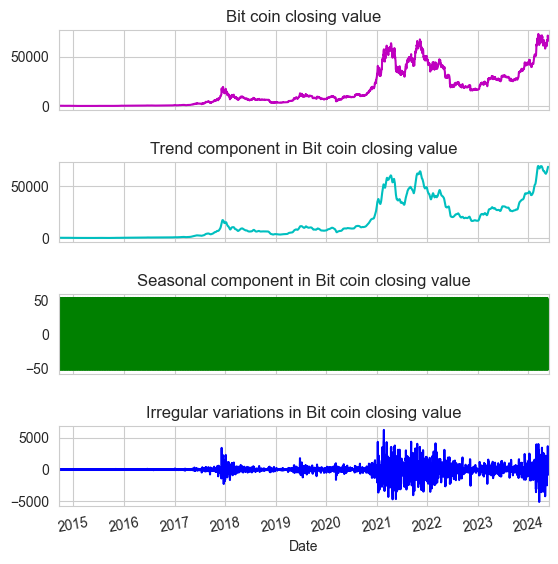

In [89]:
from statsmodels.tsa import seasonal
decompose_model = seasonal.seasonal_decompose(bit.Close.tolist(), period=12, model='additive')
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

bit['Close'].plot(ax=axarr[0], color='m', linestyle='-')
axarr[0].set_title('Bit coin closing value')

pd.Series(data=decompose_model.trend, index=bit.index).plot(color='c', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in Bit coin closing value')

pd.Series(data=decompose_model.seasonal, index=bit.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in Bit coin closing value')

pd.Series(data=decompose_model.resid, index=bit.index).plot(color='b', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in Bit coin closing value')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0);
plt.xticks(rotation=10);

In [90]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], 
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in bit coin data:', adf_result[1])

p-val of the ADF test on irregular variations in bit coin data: 2.5277523345256363e-30


nuestro residuos no siguen tendencias

## *Ejercicio 2* Modelos estadisticos

#### Simple exponetial smoothing

Lo hacemos sin la libreria 

In [104]:
tau_test = 28
train = bit.Close[:-tau_test]
test  = bit.Close[-tau_test:]
print((len(train), len(test)))

(3514, 28)


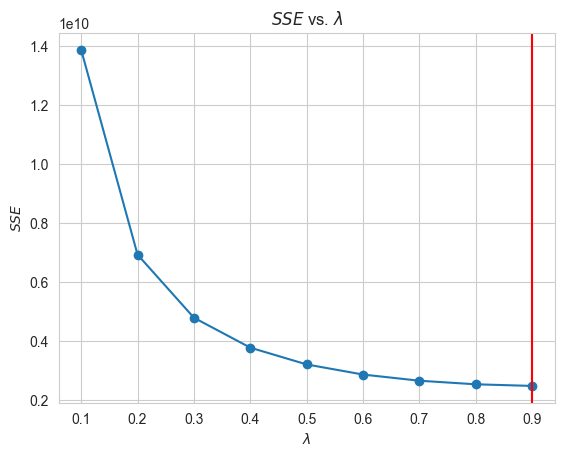

In [131]:
def firstsmooth(y, lambda_, start=None):
    ytilde = y.copy()
    if start is None:
        start = y[0]
    ytilde[0] = lambda_ * y[0] + (1 - lambda_) * start
    for i in range(1, len(y)):
        ytilde[i] = lambda_ * y[i] + (1 - lambda_) * ytilde[i - 1]
    return ytilde
lambda_vec = np.arange(0.1, 1.0, 0.1)
def measacc_fs(y, lambda_):
    out = firstsmooth(y, lambda_)
    T = len(y)
    yh = y.copy().values
    out = pd.concat([pd.Series([y[0]]), out.iloc[:-1]], ignore_index=True).values
    prederr = yh - out
    SSE = sum(prederr**2)
    MAPE = 100 * sum(abs(prederr / yh)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    ret1 = pd.DataFrame({
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD]
    })
    ret1.reset_index(drop=True, inplace=True)
    return ret1
def sse(sc):
    return measacc_fs(train, sc)['SSE'].values[0]

sse_vec = pd.Series()
for lambda_ in lambda_vec:
    sse_vec.loc[len(sse_vec)] = sse(lambda_)

opt_lambda = sse_vec.min()

plt.plot(lambda_vec, sse_vec, marker='o', linestyle='-')
plt.title("$SSE$ vs. $\lambda$")
plt.xlabel('$\lambda$')
plt.ylabel('$SSE$')
plt.axvline(x=lambda_vec[sse_vec.idxmin()], color='red')
plt.show()

Seleccionamos un lambda de 0.9 dado el grafico define el valor optimo.

In [132]:
train_smooth1 = firstsmooth(y=train, lambda_=0.9)
test_smooth1 = firstsmooth(y=test, lambda_=0.9)

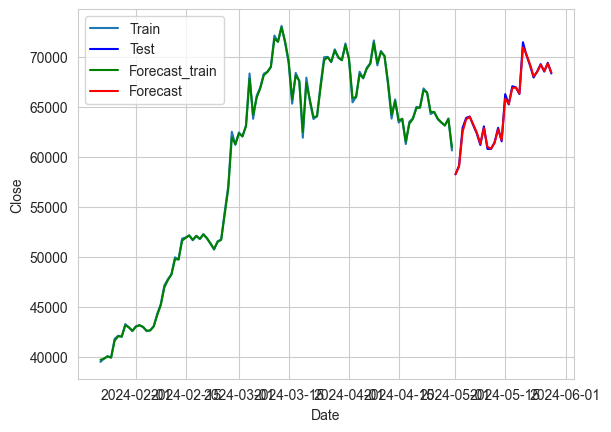

In [146]:
ax = sns.lineplot(x=train.index[-100:], y=train[-100:], label="Train")
sns.lineplot(x=test.index, y=test, label="Test", color='b')
sns.lineplot(x=train.index[-100:], y=train_smooth1[-100:], label="Forecast_train", color='g')
sns.lineplot(x=test.index, y=test_smooth1, label="Forecast", color='r')
plt.show()

In [140]:
def llf_(y, X, pr):
    # return maximized log likelihood
    nobs = float(X.shape[0])
    nobs2 = nobs / 2.0
    nobs = float(nobs)
    resid = y - pr
    ssr = np.sum((resid)**2)
    llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
    return llf

def aic(y, X, pr):
    # return aic metric
    llf = llf_(y, X, pr)
    return -2*llf+2*1

def forecast_accuracy1(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    r2adj=(1 - (1-r2))*(len(actual)-1)/(len(actual)-1-1)
    adftest=adfuller(actual, autolag='AIC')
    ADFtest=adftest[1]
    AIC=aic(actual,actual,forecast)
    k= kurtosis(actual,fisher=True)
    s=skew(actual)
    jarque=jarque_bera(actual)[1]
    KPSS=kpss(actual)[1]
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2],
                           "r2adj":[r2adj],
                           "adftest":[ADFtest],
                          "AIC":[AIC],
                           "kurtosis":[k],
                           "skew":[s],
                          "jarque-bera":[jarque],
                          "KPSS":[KPSS]},
                          index=[str_name])
    
    return df_acc
ses_sin=forecast_accuracy1(test_smooth1,test,"SES NoLIB")
ses_sin.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
SES NoLIB,130.081245,32031.823045,0.001987,178.974364,0.997457,1.035821,0.462467,371.946142,-1.147923,-0.03296,0.462454,0.013642


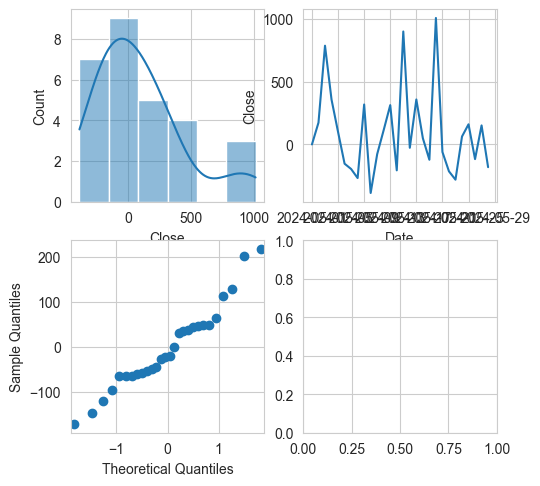

In [154]:
import statsmodels.api as sm
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(5.5, 5.5)
sns.histplot( x=test-test_smooth1, kde=True,ax=axarr[0,0])
sns.lineplot(data=test-test_smooth1,ax=axarr[0,1])
sm.qqplot(test-test_hat,ax=axarr[1,0])
plt.show()

Los residuos se ven normal y sin tendecia

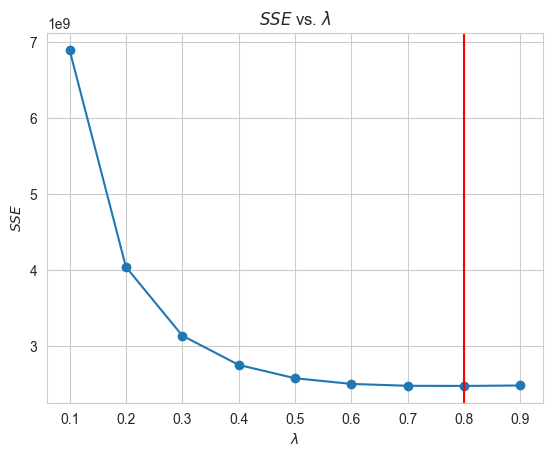

In [144]:
lambda_vec = np.arange(0.1, 1.0, 0.1)
def measacc_fs(y, lambda_): 
    y_smooth1 = firstsmooth(y=y, lambda_=lambda_)
    y_smooth2 = firstsmooth(y=y_smooth1, lambda_=lambda_)
    out = 2 * y_smooth1 - y_smooth2
    T = len(y)
    yh = y.copy().values
    out = pd.concat([pd.Series([y[0]]), out.iloc[:-1]], ignore_index=True).values
    prederr = yh - out
    SSE = sum(prederr**2)
    MAPE = 100 * sum(abs(prederr / yh)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    ret1 = pd.DataFrame({
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD]
    })
    ret1.reset_index(drop=True, inplace=True)
    return ret1
def sse(sc):
    return measacc_fs(train, sc)['SSE'].values[0]
sse_vec = pd.Series()
for lambda_ in lambda_vec:
    sse_vec.loc[len(sse_vec)] = sse(lambda_)

opt_lambda = sse_vec.min()

plt.plot(lambda_vec, sse_vec, marker='o', linestyle='-')
plt.title("$SSE$ vs. $\lambda$")
plt.xlabel('$\lambda$')
plt.ylabel('$SSE$')
plt.axvline(x=lambda_vec[sse_vec.idxmin()], color='red')
plt.show()


El grafico de arriba demuestra que el lambda optimo con 0.8 por lo que hacemos nuestro modelo de doble suavizacion con 0.8

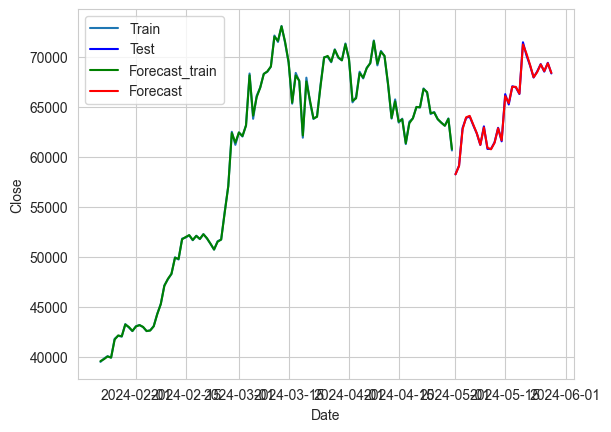

In [147]:
train_smooth1 = firstsmooth(y=train, lambda_=0.8)
train_smooth2 = firstsmooth(y=train_smooth1, lambda_=0.8)
train_hat = 2 * train_smooth1 - train_smooth2
test_smooth1 = firstsmooth(y=test, lambda_=0.8)
test_smooth2 = firstsmooth(y=test_smooth1, lambda_=0.8)
test_hat = 2 * test_smooth1 - test_smooth2
ax = sns.lineplot(x=train.index[-100:], y=train[-100:], label="Train")
sns.lineplot(x=test.index, y=test, label="Test", color='b')
sns.lineplot(x=train.index[-100:], y=train_hat[-100:], label="Forecast_train", color='g')
sns.lineplot(x=test.index, y=test_hat, label="Forecast", color='r')
plt.show()

In [148]:
des_sin=forecast_accuracy1(test_hat,test,"DES NoLIB")
des_sin.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
DES NoLIB,73.964923,8419.097801,0.001126,91.755642,0.99934,1.037776,0.462467,334.531781,-1.147923,-0.03296,0.462454,0.013642


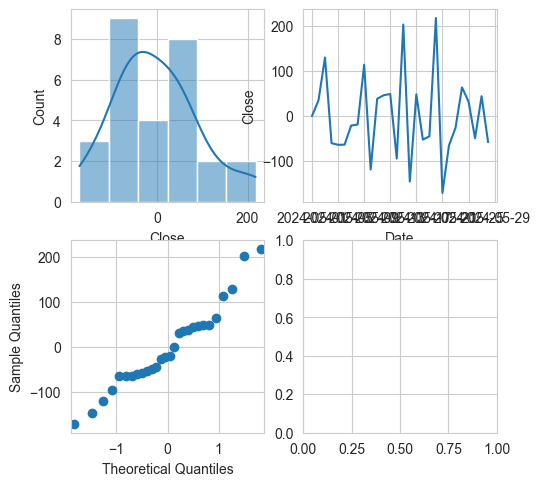

In [153]:
import statsmodels.api as sm
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(5.5, 5.5)
sns.histplot( x=test-test_hat, kde=True,ax=axarr[0,0])
sns.lineplot(data=test-test_hat,ax=axarr[0,1])
sm.qqplot(test-test_hat,ax=axarr[1,0])
plt.show()

Los residuos se ven normal y sin tendecia

Hacemos lo mismo con la librerias

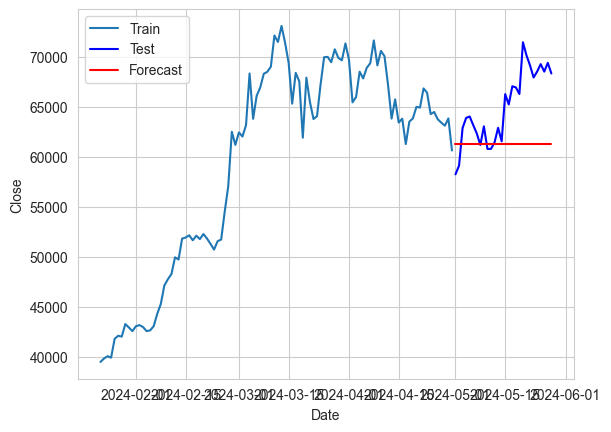

In [150]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
import statsmodels.tsa.api as smt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
warnings.filterwarnings("ignore")

def plot_model(train, test,y_pred, title):
    
    ax = sns.lineplot(x=train.index[-100:], y=train[-100:], label="Train")
    sns.lineplot(x=test.index, y=test, label="Test", color='b')
    sns.lineplot(x=test.index, y=y_pred, label="Forecast", color='r')
    plt.show()
    
def ses_optimizer(train, alphas, step):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

    return best_alpha, best_mae

def ses_model_tuning(train , test, step, title="Model Tuning - Single Exponential Smoothing"):
    
    alphas = np.arange(0.8, 1, 0.01)
    best_alpha, best_mae = ses_optimizer(train, alphas, step=step)
    final_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha, optimized=False)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    return plot_model(train, test, y_pred, title), y_pred, final_model

plot, y_pred,ses_model=ses_model_tuning(train, test, step=tau_test)               


In [151]:
from scipy.stats import normaltest, kurtosis, skew, jarque_bera
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

def forecast_accuracy(forecast, actual,model, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    r2adj=(1 - (1-r2))*(len(actual)-1)/(len(actual)-1-1)
    adftest=adfuller(actual, autolag='AIC')
    ADFtest=adftest[1]
    k= kurtosis(actual,fisher=True)
    s=skew(actual)
    jarque=jarque_bera(actual)[1]
    KPSS=kpss(actual)[1]
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2],
                           "r2adj":[r2adj],
                           "adftest":[ADFtest],
                          "AIC":[model.aic],
                          "kurtosis":[k],
                           "skew":[s],
                          "jarque-bera":[jarque],
                          "KPSS":[KPSS]},
                          index=[str_name])
    
    return df_acc
ses=forecast_accuracy(y_pred.values,test,ses_model,"SES")
ses.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
SES,4179.399708,2.679788e+07,0.062117,5176.666585,-5.061976e+29,-5.256667e+29,0.462467,47417.651297,-1.147923,-0.03296,0.462454,0.013642


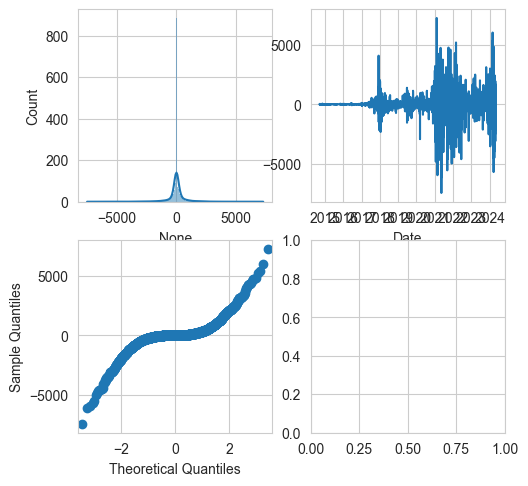

In [152]:
import statsmodels.api as sm
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(5.5, 5.5)
sns.histplot( x=ses_model.resid, kde=True,ax=axarr[0,0])
sns.lineplot(data=ses_model.resid,ax=axarr[0,1])
sm.qqplot(ses_model.resid,ax=axarr[1,0])
plt.show()

Nuestros resuidos se observa que estan distribuidos normalmente

#### Double exponetial smoothing

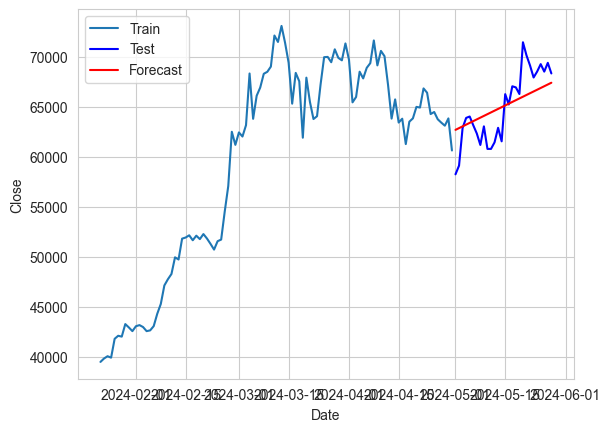

In [188]:
def des_optimizer(train, alphas, betas, trend, step):

    best_alpha, best_beta, best_mae = None, None, float("inf")

    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae

    return best_alpha, best_beta, best_mae

def des_model_tuning(train , test, step, trend, title="Model Tuning - Double Exponential Smoothing"):
    
    alphas = np.arange(0.01, 1, 0.10)
    betas = np.arange(0.01, 1, 0.10)
    best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, trend=trend, step=step)
    final_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    return plot_model(train, test, y_pred, title),y_pred,final_model

plot,y_pred,des_model=des_model_tuning(train, test, step=tau_test, trend='add')

In [189]:
Des=forecast_accuracy(y_pred.values,test,des_model,"DES")
Des.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
DES,2058.191652,6.176862e+06,0.031939,2485.329399,-2.112692,-2.193949,0.462467,61466.747777,-1.147923,-0.03296,0.462454,0.013642


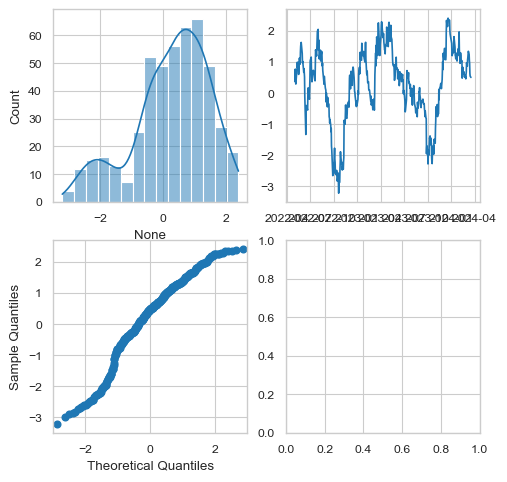

In [547]:
import statsmodels.api as sm
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(5.5, 5.5)
sns.histplot( x=des_model.resid, kde=True,ax=axarr[0,0])
sns.lineplot(data=des_model.resid,ax=axarr[0,1])
sm.qqplot(des_model.resid,ax=axarr[1,0])
plt.show()

Nuestros resuidos se observa que estan distribuidos normalmente

#### ARIMA 

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model

In [156]:
n_bit = len(bit.Close); n_test = 28 # This can be changed
train_size = n_bit - n_test

train = bit.Close[:train_size]
dates_train = bit.index[:train_size]
test_4w = bit.Close[train_size:train_size + n_test] 
dates_4w = bit.index[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_4w:", test_4w.shape)

train: (3514,)
test_4w: (28,)


In [157]:
import pmdarima as pm

model_arima = pm.arima.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57289.839, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57295.163, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57288.035, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57288.306, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57294.619, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=57289.555, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57289.327, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=57287.655, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=57289.135, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=57289.431, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=57287.924, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=57285.774, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=57284.510, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=57286.353, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0

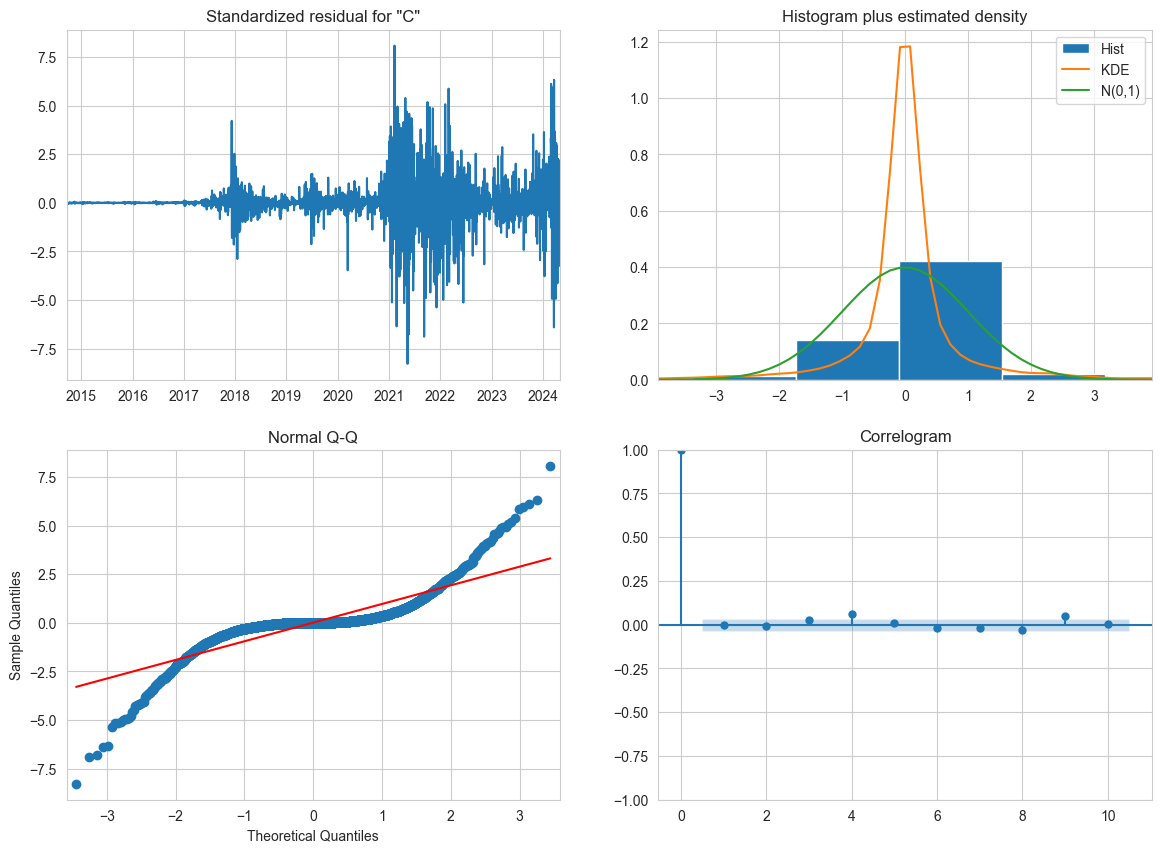

In [176]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue
model_arima = ARIMA(train, order=best_order)
model_arima_fit = model_arima.fit()

model_arima_fit.plot_diagnostics(figsize=(14,10));


Nuestro residuos son normales e independientes y no siguen una tendecia estipulada.

In [179]:
tau_h = 28

forecast = model_arima_fit.get_forecast(tau_h)
yhat = forecast.predicted_mean


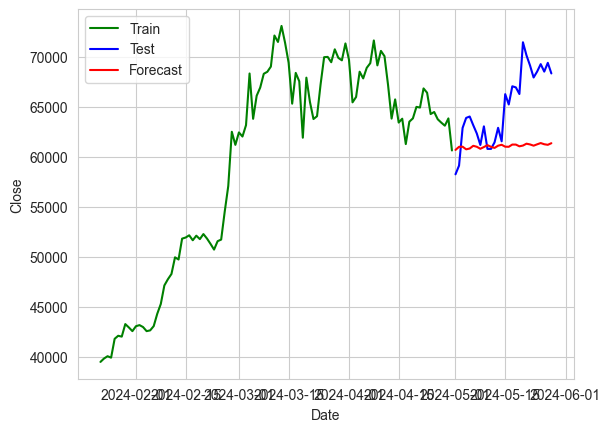

In [180]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4w, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat, label="Forecast", color='r')
plt.show()

In [181]:
arima=forecast_accuracy(np.array(test_4w), np.array(yhat),model_arima_fit, "arima")
arima.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
arima,4260.675383,2.725019e+07,0.069665,5220.171116,-1.131156,-1.174662,0.777367,57269.674612,-0.498559,-0.406407,0.588379,0.01


In [182]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions,model_fit
    
test_4wl = test_4w.tolist()
yhat_4w,model_fit_rolling  = arima_rolling(train.tolist(), test_4wl)

predicted=60691.791382, expected=58254.011719
predicted=58682.550138, expected=59123.433594
predicted=59050.599418, expected=62889.835938
predicted=62866.367442, expected=63891.472656
predicted=63776.280317, expected=64031.132813
predicted=63894.804081, expected=63161.949219
predicted=63378.031704, expected=62334.816406
predicted=62360.760538, expected=61187.941406
predicted=61117.809660, expected=63049.960938
predicted=63052.899747, expected=60792.777344
predicted=60664.876075, expected=60793.710938
predicted=60654.589112, expected=61448.394531
predicted=61453.506059, expected=62901.449219
predicted=62959.640604, expected=61552.789063
predicted=61409.870405, expected=66267.492188
predicted=65972.948822, expected=65231.582031
predicted=65334.034297, expected=67051.875000
predicted=67023.498240, expected=66940.804688
predicted=66663.765462, expected=66278.367188
predicted=66363.359260, expected=71448.195313
predicted=71476.406083, expected=70136.531250
predicted=70106.884776, expected=6

In [183]:
arima_rolling=forecast_accuracy(np.array(test_4wl), np.array(yhat_4w),model_fit_rolling, "arima rolling")
arima_rolling.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
arima rolling,1383.15553,3.512464e+06,0.021729,1874.156906,0.725301,0.753197,0.643229,57822.158317,-1.18637,0.134878,0.421694,0.014612


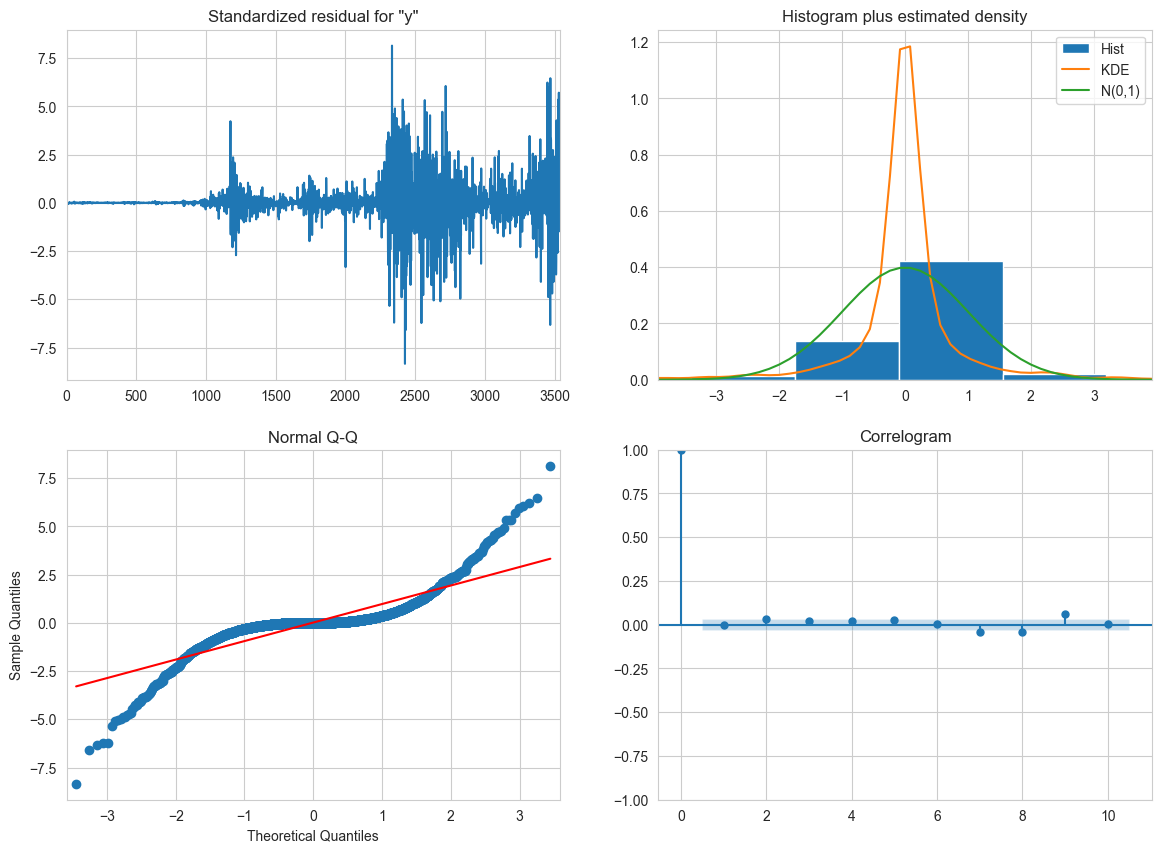

In [184]:
model_fit_rolling.plot_diagnostics(figsize=(14,10));

Nuestros residuos son normales y no tienen tendencia

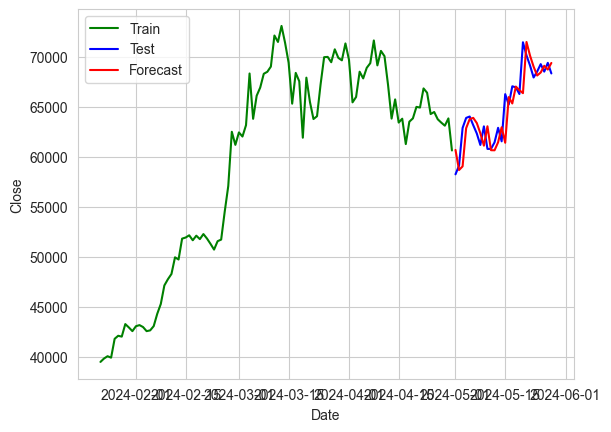

In [185]:

ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wl, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_4w, label="Forecast", color='r')
plt.show()

#### GARCH

In [168]:
from arch import arch_model

garch = arch_model(train, vol='garch', p=5, o=5, q=5)
garch_fitted = garch.fit()

def garch_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = arch_model(history, vol='garch', p=5, o=5, q=5)
        model_fit = model.fit()
        garch_forecast = model_fit.forecast(horizon=1)
        yhat = garch_forecast.mean['h.1'].iloc[-1]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions, model_fit

test_4wl = test_4w.tolist()
yhat_4wd,garch_rolling  = garch_rolling(train.tolist(), test_4w)
print(yhat_4wd)

Iteration:      1,   Func. Count:     19,   Neg. LLF: 60218.23120724111
Iteration:      2,   Func. Count:     38,   Neg. LLF: 96420.48740812839
Iteration:      3,   Func. Count:     57,   Neg. LLF: 37962.82652429592
Iteration:      4,   Func. Count:     75,   Neg. LLF: 96431.8417182795
Iteration:      5,   Func. Count:     94,   Neg. LLF: 37951.21108273412
Iteration:      6,   Func. Count:    112,   Neg. LLF: 37950.45438108692
Iteration:      7,   Func. Count:    130,   Neg. LLF: 37950.37479503853
Iteration:      8,   Func. Count:    148,   Neg. LLF: 37950.35331602952
Iteration:      9,   Func. Count:    166,   Neg. LLF: 37950.3141037608
Iteration:     10,   Func. Count:    184,   Neg. LLF: 37950.20191300544
Iteration:     11,   Func. Count:    202,   Neg. LLF: 37949.92407122124
Iteration:     12,   Func. Count:    220,   Neg. LLF: 37949.16869690437
Iteration:     13,   Func. Count:    238,   Neg. LLF: 37947.19618731493
Iteration:     14,   Func. Count:    256,   Neg. LLF: 37942.558567

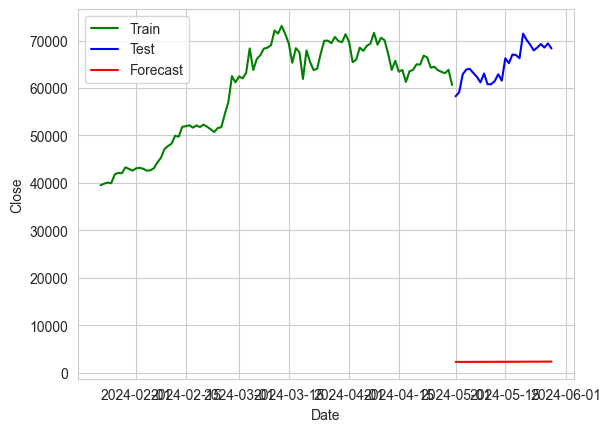

In [169]:

ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wl, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_4wd, label="Forecast", color='r')
plt.show()

In [170]:
garch_r=forecast_accuracy(np.array(test_4wl), np.array(yhat_4wd),garch_rolling, "garch rolling")
garch_r.head()

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
garch rolling,62670.305149,3.940225e+09,26.948982,62771.213294,-307.153341,-318.966931,0.998229,73308.093503,-1.068363,0.185453,0.474229,0.01


Comparamos los modelos anteriores:

In [192]:
modelos=pd.concat([ses,ses_sin,Des,des_sin,arima, arima_rolling, garch_r], axis=0)
modelos

,MAE,MSE,MAPE,RMSE,R2,r2adj,adftest,AIC,kurtosis,skew,jarque-bera,KPSS
SES,4179.399708,2.679788e+07,0.062117,5176.666585,-5.061976e+29,-5.256667e+29,0.462467,47417.651297,-1.147923,-0.032960,0.462454,0.013642
SES NoLIB,130.081245,3.203182e+04,0.001987,178.974364,9.974574e-01,1.035821e+00,0.462467,371.946142,-1.147923,-0.032960,0.462454,0.013642
DES,2058.191652,6.176862e+06,0.031939,2485.329399,-2.112692e+00,-2.193949e+00,0.462467,61466.747777,-1.147923,-0.032960,0.462454,0.013642
DES NoLIB,73.964923,8.419098e+03,0.001126,91.755642,9.993398e-01,1.037776e+00,0.462467,334.531781,-1.147923,-0.032960,0.462454,0.013642
arima,4260.675383,2.725019e+07,0.069665,5220.171116,-1.131156e+00,-1.174662e+00,0.777367,57269.674612,-0.498559,-0.406407,0.588379,0.010000
arima rolling,1383.155530,3.512464e+06,0.021729,1874.156906,7.253006e-01,7.531968e-01,0.643229,57822.158317,-1.186370,0.134878,0.421694,0.014612
garch rolling,62670.305149,3.940225e+09,26.948982,62771.213294,-3.071533e+02,-3.189669e+02,0.998229,73308.093503,-1.068363,0.185453,0.474229,0.010000


El modelo con menor aic la doble suaviacion sin liberia. Ninguno de los test es estacionario y las Kurtosis de los test tiene un valor menor a cero lo que hace que tenga una distribicion distribución platicúrtica que implica que los valores tienden a ser mas dispersos. Los skew de los test de los modelos SES DES y arima tienen un sesgo a la izquierda y arima rolling y garch rolling el test tiene un sesgo a la derecha. Ningun de nuestros test tiene una distribucion normal.

## *Ejercicio 3* Modelos de deep learning

In [398]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [429]:
scaler = MinMaxScaler(feature_range=(0, 1))
bit['scaled_close'] = scaler.fit_transform(np.array(bit['close']).reshape(-1, 1))
split_date = datetime.datetime(year=2023, month=12, day=1)
df_train = bit.loc[bit['date']<split_date]
df_train.reset_index(drop=True, inplace=True)
df_val = bit.loc[bit['date']>=split_date]
df_val.reset_index(drop=True, inplace=True)
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (398, 9)
Shape of test: (121, 9)


In [430]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        if i-nb_timesteps <= 4:
            print(i-nb_timesteps, i-1, i)
        X.append(list(ts.loc[i-nb_timesteps:i-1])) #Regressors
        y.append(ts.loc[i]) #Target
    X, y = np.array(X), np.array(y)
    return X, y

X_train, y_train = makeXy(df_train['scaled_close'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [436]:
X_val, y_val = makeXy(df_val['scaled_close'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [432]:
input_layer = Input(shape=(7,), dtype='float32')
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense3)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [433]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [443]:
save_weights_at = os.path.join('keras_models', 'MLP_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch');ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=2, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);

Epoch 1/20
25/25 - 0s - 2ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 2/20
25/25 - 0s - 1ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 3/20
25/25 - 0s - 885us/step - loss: 0.0071 - val_loss: 0.0017
Epoch 4/20
25/25 - 0s - 1ms/step - loss: 0.0086 - val_loss: 0.0016
Epoch 5/20
25/25 - 0s - 915us/step - loss: 0.0065 - val_loss: 0.0020
Epoch 6/20
25/25 - 0s - 907us/step - loss: 0.0069 - val_loss: 0.0033
Epoch 7/20
25/25 - 0s - 889us/step - loss: 0.0075 - val_loss: 0.0022
Epoch 8/20
25/25 - 0s - 875us/step - loss: 0.0068 - val_loss: 0.0018
Epoch 9/20
25/25 - 0s - 923us/step - loss: 0.0066 - val_loss: 0.0016
Epoch 10/20
25/25 - 0s - 1ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 11/20
25/25 - 0s - 911us/step - loss: 0.0071 - val_loss: 0.0017
Epoch 12/20
25/25 - 0s - 893us/step - loss: 0.0069 - val_loss: 0.0017
Epoch 13/20
25/25 - 0s - 912us/step - loss: 0.0066 - val_loss: 0.0022
Epoch 14/20
25/25 - 0s - 887us/step - loss: 0.0063 - val_loss: 0.0017
Epoch 15/20
25/25 - 0s - 911us/step -

In [519]:
mlp=ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=2, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);

Epoch 1/20
25/25 - 0s - 8ms/step - loss: 0.0490 - val_loss: 0.0450
Epoch 2/20
25/25 - 0s - 2ms/step - loss: 0.0474 - val_loss: 0.0297
Epoch 3/20
25/25 - 0s - 2ms/step - loss: 0.0515 - val_loss: 0.0367
Epoch 4/20
25/25 - 0s - 5ms/step - loss: 0.0471 - val_loss: 0.0280
Epoch 5/20
25/25 - 0s - 2ms/step - loss: 0.0470 - val_loss: 0.0299
Epoch 6/20
25/25 - 0s - 2ms/step - loss: 0.0468 - val_loss: 0.0294
Epoch 7/20
25/25 - 0s - 2ms/step - loss: 0.0458 - val_loss: 0.0317
Epoch 8/20
25/25 - 0s - 2ms/step - loss: 0.0482 - val_loss: 0.0333
Epoch 9/20
25/25 - 0s - 2ms/step - loss: 0.0452 - val_loss: 0.0285
Epoch 10/20
25/25 - 0s - 2ms/step - loss: 0.0478 - val_loss: 0.0344
Epoch 11/20
25/25 - 0s - 2ms/step - loss: 0.0462 - val_loss: 0.0329
Epoch 12/20
25/25 - 0s - 3ms/step - loss: 0.0471 - val_loss: 0.0355
Epoch 13/20
25/25 - 0s - 3ms/step - loss: 0.0452 - val_loss: 0.0274
Epoch 14/20
25/25 - 0s - 2ms/step - loss: 0.0441 - val_loss: 0.0297
Epoch 15/20
25/25 - 0s - 3ms/step - loss: 0.0438 - val_lo

In [445]:
best_model = load_model(os.path.join('keras_models', 'MLP_weights.01-0.0016.keras'), compile=False)
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2dbcfc0e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [446]:
r2 = r2_score(df_val['close'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: 0.8451


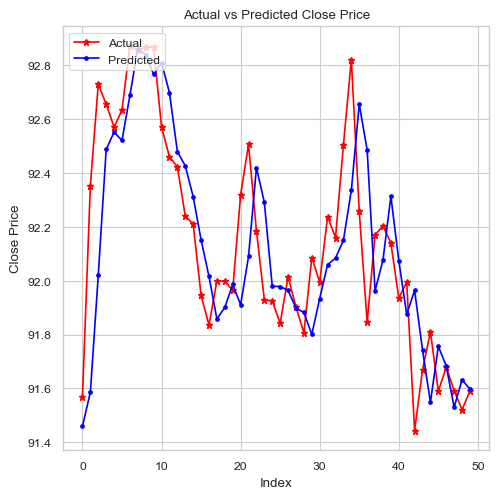

In [450]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['close'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Close Price')
plt.ylabel("Close Price")
plt.xlabel('Index');

### LSTM

In [451]:
from keras.layers import Dense, Input, Dropout
from keras.layers import LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [452]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of 3D arrays:', X_train.shape, X_val.shape)
input_layer = Input(shape=(7,1), dtype='float32')
lstm_layer1 = LSTM(64, input_shape=(7,1), return_sequences=True)(input_layer)
lstm_layer2 = LSTM(32, input_shape=(7,64), return_sequences=False)(lstm_layer1)
dropout_layer = Dropout(0.2)(lstm_layer2)
output_layer = Dense(1, activation='linear')(dropout_layer)
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam') #SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Shape of 3D arrays: (391, 7, 1) (114, 7, 1)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 7, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [461]:
save_weights_at = os.path.join('keras_models', 'LSTM_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch')

ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=30,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0537 - val_loss: 0.0340
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0581 - val_loss: 0.0322
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0580 - val_loss: 0.0360
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0618 - val_loss: 0.0379
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0573 - val_loss: 0.0320
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0523 - val_loss: 0.0351
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0577 - val_loss: 0.0348
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0530 - val_loss: 0.0376
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0500 - val_loss: 0.0306
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562 - val_loss: 0.0314
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0534 - val_loss: 0.0308
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0478 - val_lo

In [462]:
best_model = load_model(os.path.join('keras_models', 'LSTM_weights.01-0.0340.keras'))

preds = best_model.predict(X_val)
pred_close= scaler.inverse_transform(preds)
pred_close = np.squeeze(pred_close)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [463]:
from sklearn.metrics import mean_absolute_error
r2 = r2_score(df_val['close'].loc[7:], pred_close)
print('R-squared for the validation set:', round(r2,4))
mae = mean_absolute_error(df_val["close"].loc[7:], pred_close)
print('MAE for the validation set:', round(mae, 4))

R-squared for the validation set: 0.8066
MAE for the validation set: 0.2059
